Data Shape:  (3475226, 20)
Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'Airport_fee',
       'cbd_congestion_fee', 'hour', 'day_of_week', 'trip_duration_min'],
      dtype='object')
        fare_amount  trip_distance  trip_duration_min
count  3.475226e+06   3.475226e+06       3.475226e+06
mean   1.708180e+01   5.855126e+00       1.501812e+01
std    4.634729e+02   5.646016e+02       3.871358e+01
min   -9.000000e+02   0.000000e+00      -5.147232e+04
25%    8.600000e+00   9.800000e-01       7.283333e+00
50%    1.211000e+01   1.670000e+00       1.170000e+01
75%    1.950000e+01   3.100000e+00       1.833333e+01
max    8.633721e+05   2.764236e+05       5.626317e+03


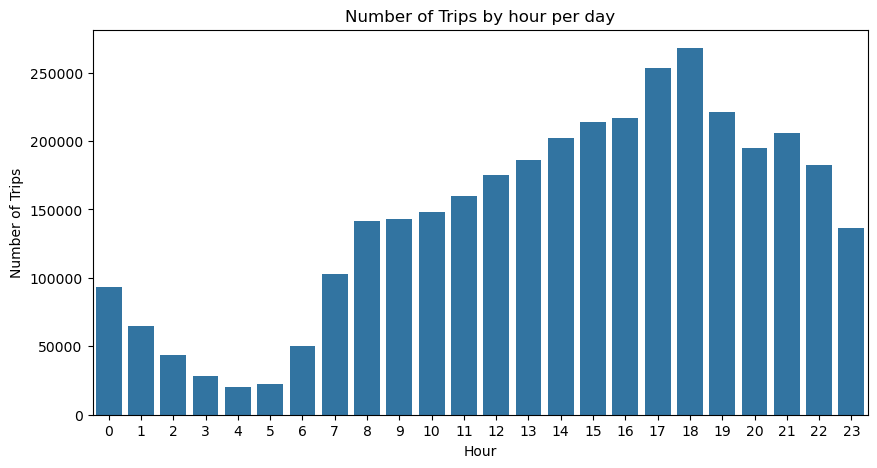

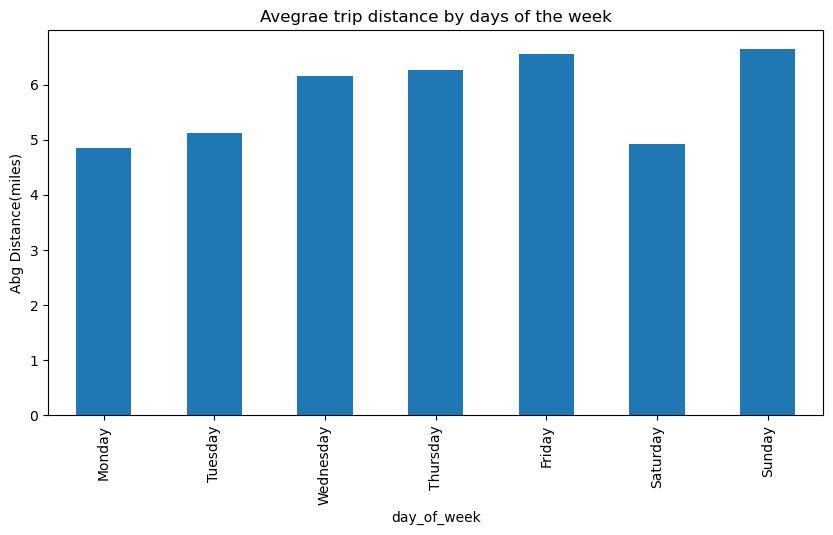

In [26]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##Read the file 
df = pd.read_parquet(r"C:\PythonWork\data\yellow_tripdata_2025-01.parquet")


##Show basic information 
print("Data Shape: " , df.shape)


## Convert datetime columns
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])


##Create new features
df['hour'] = df['tpep_pickup_datetime'].dt.hour
df['day_of_week'] = df['tpep_pickup_datetime'].dt.day_name()
df['trip_duration_min'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60
print(df.columns)
print(df[[ 'fare_amount','trip_distance','trip_duration_min']].describe())

##Plot : trips per hour
plt.figure(figsize=(10,5))
sns.countplot(x='hour',data = df)
plt.title('Number of Trips by hour per day')
plt.xlabel('Hour')
plt.ylabel('Number of Trips')
plt.show()

##plot : Avergae trip distance by week 
plt.figure(figsize=(10,5))
df.groupby('day_of_week')['trip_distance'].mean().reindex (['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']).plot(kind = 'bar')
plt.title('Avegrae trip distance by days of the week')
plt.ylabel('Abg Distance(miles)')
plt.show()